In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df=df.drop(columns=['Cabin','Ticket','PassengerId'])

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Missing Data imputation

<Axes: xlabel='Embarked', ylabel='Count'>

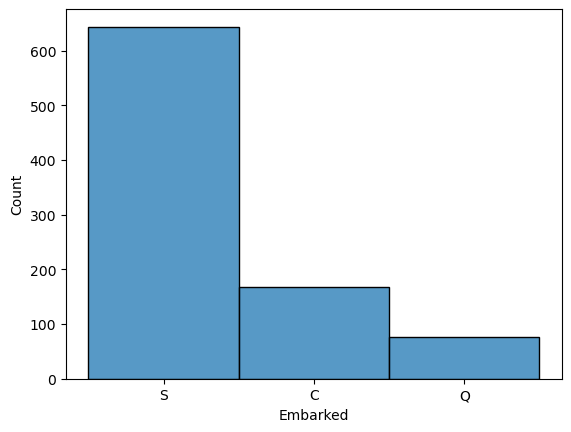

In [7]:
sns.histplot(df['Embarked'])

In [20]:
mode = df['Embarked'].mode()
mode

0    S
Name: Embarked, dtype: object

In [25]:
df.loc[df['Embarked'].isnull(),'Embarked'].fillna(value=mode)
df.loc[df['Embarked'].isnull(),'Embarked']

C:\Users\Hp\AppData\Local\Temp\ipykernel_9892\3729199559.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['Embarked'].isnull(),'Embarked'].fillna(value=mode)


61     NaN
829    NaN
Name: Embarked, dtype: object

In [15]:
# df.drop([61,829])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [ ]:
medi = df['Embarked'].mode()


0    S
Name: Embarked, dtype: object

In [ ]:
df['Embarked']=df['Embarked'].fillna(value=medi)

<Axes: xlabel='Age', ylabel='Density'>

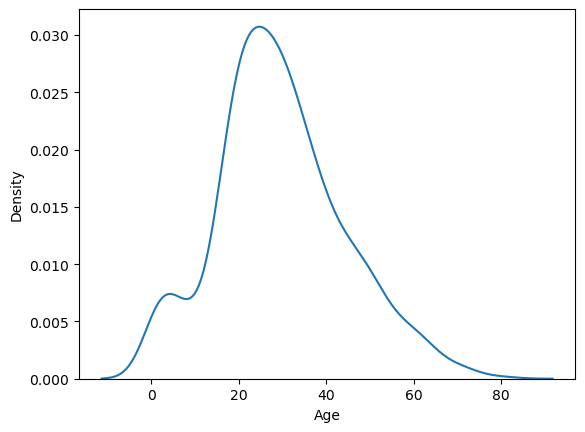

In [ ]:
sns.kdeplot(df['Age'])

In [ ]:
df['Age'].isnull().mean()*100

19.865319865319865

In [ ]:
mena=df['Age'].mean()

In [ ]:
df['Age_imputed']=df['Age'].fillna(mena)

<Axes: xlabel='Age_imputed', ylabel='Density'>

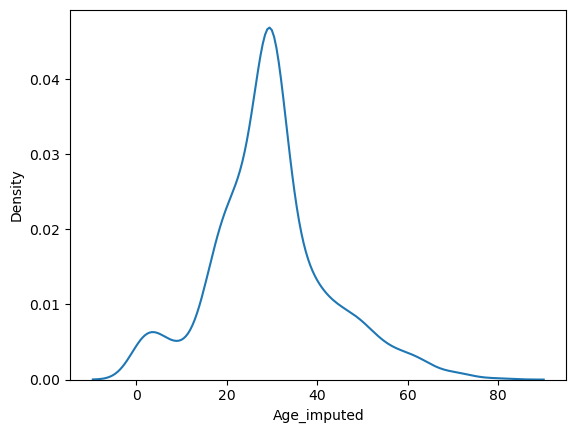

In [ ]:
sns.kdeplot(df['Age_imputed'])

changed the formation of distribution graph, same would happen with meadian

In [ ]:
df['Age_imputed'] = df['Age']

In [ ]:
# Random imputation
df.loc[df['Age'].isnull(),'Age_imputed'] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values

In [ ]:
df['Age_imputed'].isnull().sum()

0

<Axes: xlabel='Age_imputed', ylabel='Density'>

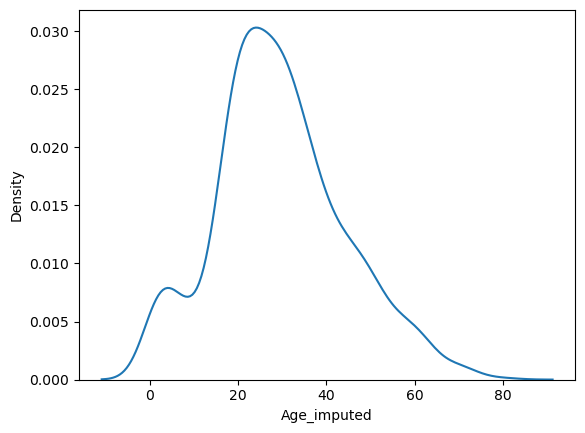

In [ ]:
sns.kdeplot(x=df['Age_imputed'])

distribution curve is nearly same

## Data Transformation

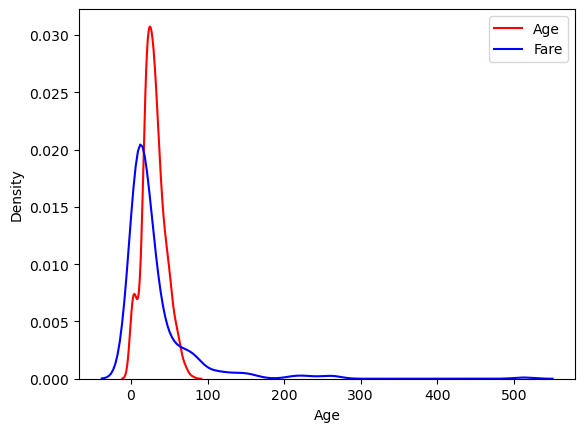

In [ ]:
sns.kdeplot(df['Age'],label='Age',color='red')
sns.kdeplot(df['Fare'],label='Fare',color='blue')

plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
scale.fit(df[['Age_imputed','Fare']])

StandardScaler()

In [ ]:
df[['Age_imputed_scaled','Fare_scaled']]=scale.transform(df[['Age_imputed','Fare']])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_imputed,Age_imputed_scaled,Fare_scaled
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,22.0,-0.521337,-0.502445
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,38.0,0.574679,0.786845
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,26.0,-0.247333,-0.488854
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,35.0,0.369176,0.420730
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,35.0,0.369176,-0.486337


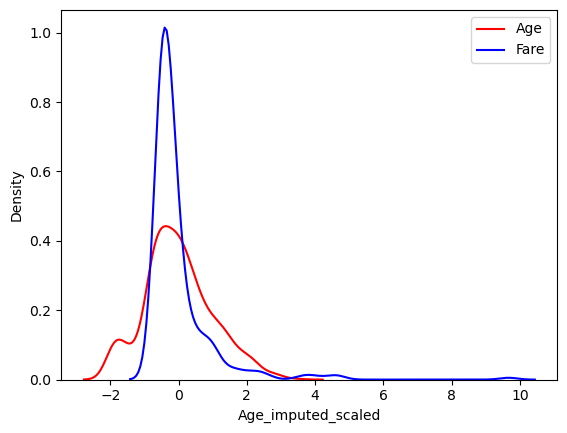

In [ ]:
sns.kdeplot(df['Age_imputed_scaled'],label='Age',color='red')
sns.kdeplot(df['Fare_scaled'],label='Fare',color='blue')

plt.legend()
plt.show()

### categorical data handling

In [ ]:
from sklearn.preprocessing import LabelEncoder

ohe = LabelEncoder()

In [ ]:
df['Sex']=ohe.fit_transform(df[['Sex']])

C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# male is 1 female is 0
df['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_imputed,Age_imputed_scaled,Fare_scaled
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,22.0,-0.521337,-0.502445
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,38.0,0.574679,0.786845
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,26.0,-0.247333,-0.488854
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,35.0,0.369176,0.420730
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,35.0,0.369176,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,27.0,-0.178832,-0.386671
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,19.0,-0.726840,-0.044381
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S,34.0,0.300675,-0.176263
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,26.0,-0.247333,-0.044381


In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False,dtype=np.int32)

In [ ]:
OHE.fit(df[['Embarked']])

df_ohe = OHE.transform(df[['Embarked']])
# df[['','S','Q']]=
df_ohe = pd.DataFrame(df_ohe)
df[df_ohe.iloc[:,3]==1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_imputed,Age_imputed_scaled,Fare_scaled
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,NaN,38.0,0.574679,0.962353
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,NaN,62.0,2.218703,0.962353


feature engneering